In [16]:
%pylab inline 
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [17]:
data = genfromtxt("./running_clean_nov.csv", delimiter=',')
lon=data[:,0]
lat=data[:,1]
hour=data[:,3]
minu=data[:,4]
seg=data[:,5]

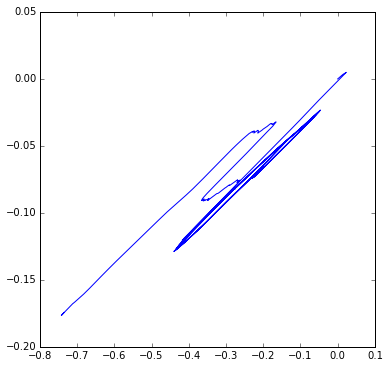

In [18]:
r= 6400
x= r*np.sin(radians(90-lat))*np.cos(radians(lon))
y=r*np.cos(radians(90-lat))*np.cos(radians(lon))


uniOriente=[-np.sin(radians(-74.0758)),np.cos(radians(-74.0758)),0]
uniNorte=[np.cos(radians(4.5981))*cos(radians(-74.0758)),np.sin(radians(4.5981))*cos(radians(-74.0758)),0]

yBog=np.zeros(len(y))
xBog=np.zeros(len(x))

for i in range(len(x)):
    xBog[i]=x[i]*uniOriente[0]+y[i]*uniOriente[1]
    yBog[i]=x[i]*uniNorte[0]+y[i]*uniNorte[1]


desxBog=np.zeros(len(xBog))
desyBog=np.zeros(len(yBog))

for i in range(len(xBog)):
    desxBog[i]=xBog[i]-xBog[0]
    desyBog[i]=yBog[i]-yBog[0]

figure(figsize(6,6))
plot(desxBog,desyBog)
show()


sonpy? para los mapas